In [1]:
from transformers import AutoImageProcessor, SuperPointForKeypointDetection
import torch
from PIL import Image
import requests

imp_path = "lena.png"
image = Image.open(imp_path)

processor = AutoImageProcessor.from_pretrained("magic-leap-community/superpoint")
model = SuperPointForKeypointDetection.from_pretrained("magic-leap-community/superpoint")

inputs = processor(image, return_tensors="pt")
outputs = model(**inputs)

C:\Users\Sherin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [2]:
image_sizes = image.size[::-1]  # (height, width)
print("Image size (H, W):", image_sizes)
output = processor.post_process_keypoint_detection(outputs, [image_sizes])

Image size (H, W): (512, 512)


In [3]:
output

[{'keypoints': tensor([[332,  19],
          [332,  24],
          [223,  43],
          [227,  43],
          [232,  44],
          [236,  45],
          [255,  49],
          [ 25,  50],
          [259,  51],
          [187,  54],
          [ 64,  57],
          [454,  58],
          [ 23,  59],
          [272,  59],
          [ 64,  62],
          [332,  62],
          [159,  65],
          [291,  72],
          [443,  72],
          [295,  75],
          [367,  76],
          [368,  82],
          [139,  93],
          [309,  94],
          [501,  98],
          [133, 100],
          [318, 101],
          [228, 102],
          [132, 105],
          [252, 109],
          [404, 112],
          [392, 113],
          [416, 113],
          [287, 114],
          [ 84, 115],
          [184, 119],
          [153, 125],
          [260, 128],
          [304, 128],
          [419, 129],
          [300, 130],
          [334, 130],
          [214, 131],
          [364, 133],
          [250, 135

In [ ]:
output[0]['keypoints']

tensor([[332,  19],
        [332,  24],
        [223,  43],
        [227,  43],
        [232,  44],
        [236,  45],
        [255,  49],
        [ 25,  50],
        [259,  51],
        [187,  54],
        [ 64,  57],
        [454,  58],
        [ 23,  59],
        [272,  59],
        [ 64,  62],
        [332,  62],
        [159,  65],
        [291,  72],
        [443,  72],
        [295,  75],
        [367,  76],
        [368,  82],
        [139,  93],
        [309,  94],
        [501,  98],
        [133, 100],
        [318, 101],
        [228, 102],
        [132, 105],
        [252, 109],
        [404, 112],
        [392, 113],
        [416, 113],
        [287, 114],
        [ 84, 115],
        [184, 119],
        [153, 125],
        [260, 128],
        [304, 128],
        [419, 129],
        [300, 130],
        [334, 130],
        [214, 131],
        [364, 133],
        [250, 135],
        [339, 136],
        [204, 138],
        [ 25, 142],
        [216, 144],
        [280, 144],


In [6]:
output[0]['descriptors']

tensor([[-0.0446, -0.0103, -0.0296,  ...,  0.0311,  0.0034,  0.0727],
        [-0.0309, -0.0036, -0.0321,  ...,  0.0347, -0.0382,  0.0899],
        [-0.0088, -0.1497,  0.1271,  ..., -0.0237,  0.0166,  0.0126],
        ...,
        [ 0.1271,  0.0665,  0.0065,  ..., -0.0384,  0.0725, -0.1075],
        [-0.0468, -0.0207, -0.0101,  ..., -0.0097,  0.0328,  0.0403],
        [-0.0926,  0.0639,  0.0133,  ..., -0.0579,  0.0328,  0.0351]],
       grad_fn=<IndexBackward0>)

In [10]:
print("size of keypoint:%d size of scores:%d"%(len(output[0]["keypoints"]),len(output[0]["scores"])))

size of keypoint:469 size of scores:469


In [11]:
print("Keypoints shape:", output[0]["scores"])

Keypoints shape: tensor([0.0882, 0.0099, 0.0587, 0.0072, 0.0101, 0.0133, 0.0070, 0.0150, 0.0108,
        0.0073, 0.0065, 0.1452, 0.0979, 0.0069, 0.0060, 0.0066, 0.1253, 0.0091,
        0.1875, 0.1649, 0.0744, 0.0089, 0.0134, 0.1656, 0.0363, 0.0225, 0.0861,
        0.0179, 0.0992, 0.0336, 0.0781, 0.1253, 0.1646, 0.0634, 0.0097, 0.0132,
        0.1125, 0.0062, 0.0116, 0.1527, 0.0150, 0.0746, 0.0116, 0.0708, 0.0838,
        0.0082, 0.0119, 0.0074, 0.0801, 0.0191, 0.0061, 0.3070, 0.0485, 0.0084,
        0.3447, 0.0306, 0.0076, 0.1705, 0.0098, 0.1929, 0.0078, 0.0640, 0.3484,
        0.0052, 0.2150, 0.0436, 0.0636, 0.0068, 0.0526, 0.0053, 0.0073, 0.0058,
        0.0053, 0.0184, 0.0864, 0.0404, 0.0054, 0.1190, 0.3053, 0.2048, 0.0063,
        0.0493, 0.0073, 0.0403, 0.2163, 0.0062, 0.0465, 0.3260, 0.1086, 0.0470,
        0.0602, 0.0990, 0.3046, 0.0317, 0.0151, 0.0245, 0.0055, 0.2998, 0.0066,
        0.0783, 0.0939, 0.1265, 0.0070, 0.0256, 0.0201, 0.3822, 0.0112, 0.3647,
        0.0119, 0.1456,

C:\Users\Sherin\AppData\Local\Temp\ipykernel_14348\3442049919.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_tensor = torch.tensor(keypoints[:, 0])
C:\Users\Sherin\AppData\Local\Temp\ipykernel_14348\3442049919.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(keypoints[:, 1])


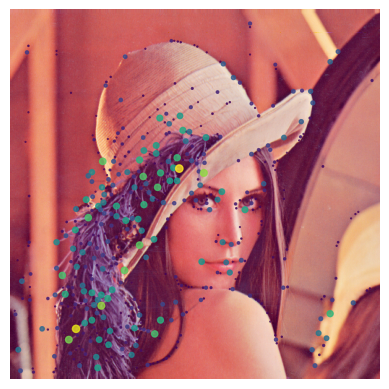

In [ ]:
import matplotlib.pyplot as plt
import torch

keypoints = output[0]["keypoints"]
scores = output[0]["scores"]
descriptors = output[0]["descriptors"]

x_tensor = torch.tensor(keypoints[:, 0])
y_tensor = torch.tensor(keypoints[:, 1])

# print("Keypoints x:", x_tensor)
# print("Keypoints y", y_tensor)

plt.axis("off")
plt.imshow(image)
plt.scatter(
    keypoints[:, 0].detach().numpy(),
    keypoints[:, 1].detach().numpy(),
    c=scores.detach().numpy() * 100,
    s=scores.detach().numpy() * 50,
    alpha=0.8
)
plt.savefig(f"output_image.png")


In [18]:
keypoints

tensor([[332,  19],
        [332,  24],
        [223,  43],
        [227,  43],
        [232,  44],
        [236,  45],
        [255,  49],
        [ 25,  50],
        [259,  51],
        [187,  54],
        [ 64,  57],
        [454,  58],
        [ 23,  59],
        [272,  59],
        [ 64,  62],
        [332,  62],
        [159,  65],
        [291,  72],
        [443,  72],
        [295,  75],
        [367,  76],
        [368,  82],
        [139,  93],
        [309,  94],
        [501,  98],
        [133, 100],
        [318, 101],
        [228, 102],
        [132, 105],
        [252, 109],
        [404, 112],
        [392, 113],
        [416, 113],
        [287, 114],
        [ 84, 115],
        [184, 119],
        [153, 125],
        [260, 128],
        [304, 128],
        [419, 129],
        [300, 130],
        [334, 130],
        [214, 131],
        [364, 133],
        [250, 135],
        [339, 136],
        [204, 138],
        [ 25, 142],
        [216, 144],
        [280, 144],


In [17]:
x = keypoints[:, 0].detach().numpy();
y = keypoints[:, 1].detach().numpy();
x
y

array([ 19,  24,  43,  43,  44,  45,  49,  50,  51,  54,  57,  58,  59,
        59,  62,  62,  65,  72,  72,  75,  76,  82,  93,  94,  98, 100,
       101, 102, 105, 109, 112, 113, 113, 114, 115, 119, 125, 128, 128,
       129, 130, 130, 131, 133, 135, 136, 138, 142, 144, 144, 147, 147,
       147, 149, 150, 150, 152, 155, 156, 158, 161, 164, 167, 169, 169,
       170, 171, 171, 172, 172, 172, 174, 174, 176, 176, 176, 177, 177,
       177, 177, 179, 180, 181, 182, 182, 183, 186, 188, 188, 189, 194,
       194, 195, 197, 198, 198, 198, 199, 200, 200, 200, 200, 202, 203,
       204, 205, 205, 208, 208, 209, 209, 209, 210, 210, 210, 211, 211,
       212, 213, 213, 213, 214, 215, 216, 217, 219, 220, 221, 222, 222,
       224, 224, 225, 225, 226, 226, 227, 228, 229, 230, 231, 231, 233,
       235, 235, 237, 237, 238, 238, 241, 241, 243, 243, 246, 246, 246,
       246, 247, 247, 250, 250, 252, 252, 253, 253, 253, 254, 254, 256,
       256, 256, 258, 258, 258, 259, 260, 261, 262, 262, 262, 26